In [42]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch.autograd.functional import jacobian

jac shape torch.Size([100, 2, 100, 2])


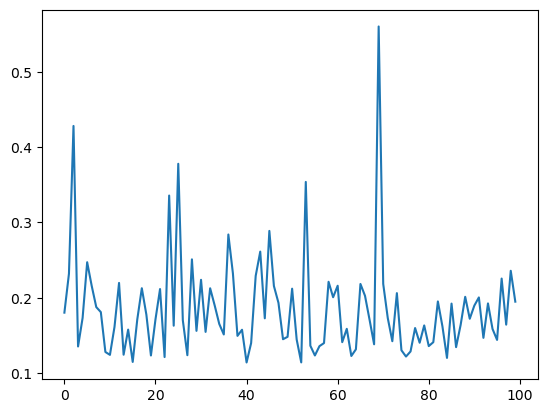

In [43]:
dt = 0.1
g = 9.81
def dynamics(x):
    # x of shape [N, 2]
    xdot = torch.zeros_like(x)
    xdot[:, 0] += dt*x[:, 1] + dt*x[:, 0]/10 
    xdot[:, 1] -= dt*x[:, 1]**2 + dt*x[:, 0]**0.5
    return xdot
inputs = torch.rand(100, 2)
jac = jacobian(dynamics, inputs)
print("jac shape", jac.shape)

jac = torch.stack([jac[i, :, i] for i in range(len(inputs))])
jac_norms = [torch.norm(j) for j in jac]
plt.plot(jac_norms)

In [88]:
jac = np.load("jac.npy")
jac2 = np.load("jac2.npy")
jac.shape, jac2.shape

((1, 11, 14), (1, 12, 18))

In [90]:
jac

array([[[ 1.0000000e+00,  2.9946255e-02, -1.0832769e-02, -1.2729077e-02,
          1.0106725e-03, -1.8259618e-05,  1.6539238e-02,  2.9447541e-04,
         -3.2982593e-05, -1.8509805e-04,  1.6076425e-05, -2.7248331e-03,
         -1.8768107e-04,  3.4211276e-04],
        [-1.5110688e-03,  9.9995279e-01, -4.0217787e-02,  1.3779385e-02,
         -9.2246961e-03, -1.6497885e-04, -6.8117086e-05,  1.5587298e-02,
         -4.6530715e-04,  1.8081479e-04, -1.3688300e-04,  7.3387194e-03,
          1.3461763e-03,  6.8364764e-04],
        [ 4.7871969e-03, -2.3869018e-04,  9.1018444e-01, -3.4638054e-03,
          9.0517374e-03, -2.6623859e-05,  1.7790873e-04, -8.1870086e-05,
          1.4824935e-02,  1.0272512e-05,  1.3152753e-04,  1.8922009e-02,
         -4.0182327e-03, -3.5658048e-04],
        [ 2.0078672e-03,  9.9899038e-04,  1.6167145e-02,  9.2612308e-01,
          2.4210289e-03, -1.6855868e-04,  2.5314604e-05, -1.7506568e-04,
          4.2474538e-04,  1.5406997e-02,  1.5671812e-05, -3.7742855e-03

In [84]:
jac2[7]

array([ 9.9999988e-01,  0.0000000e+00, -2.7032406e+00,  2.5570686e+00,
        0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  9.9999994e-01,
        2.3233751e-02,  1.1327168e-01,  0.0000000e+00,  0.0000000e+00,
        0.0000000e+00, -3.4228542e-08, -7.9525747e-10, -1.0127279e-08,
        0.0000000e+00,  0.0000000e+00], dtype=float32)